In [1]:
import pandas as pd
from collections import Counter
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_json('../../data/aliexpress/Aliexpress_Meta_Train.json', lines=True)
df_test = pd.read_json('../../data/aliexpress/Aliexpress_Meta_Test.json', lines=True)

(array([ 278677.,       0.,       0., 5220458.,       0.,       0.,
        7037912.,       0.,       0.,  160699.]),
 array([2. , 2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 4.4, 4.7, 5. ]),
 <BarContainer object of 10 artists>)

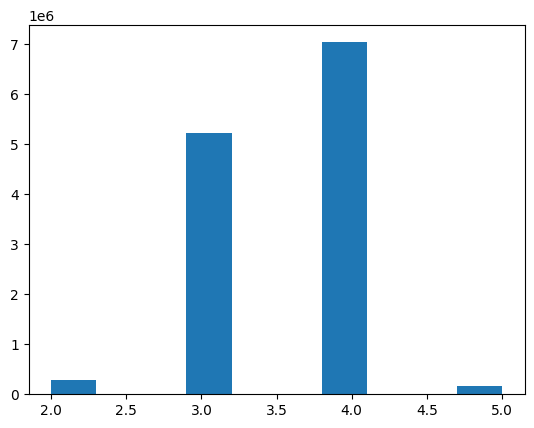

In [3]:
plt.hist(df_train.category.apply(len))

In [4]:
tmp = df_train.category.tolist()
tmp = [j for i in tmp for j in i]
tmp = Counter(tmp)
tmp.most_common(10)

[('Home & Garden', 2448287),
 ('Automobiles & Motorcycles', 1523034),
 ('Sports & Entertainment', 1330039),
 ('Home Improvement', 1173212),
 ('Beauty & Health', 802416),
 ('Consumer Electronics', 685978),
 ('Auto Replacement Parts', 685384),
 ('Kitchen,Dining & Bar', 641776),
 ('Tools', 580417),
 ('Mother & Kids', 559270)]

In [5]:
{
    '# products': len(df_train),
    '# category paths': len(set(df_train.category.apply(tuple))),
    '# category nodes': len(set([j for i in df_train.to_dict('records') for j in i['category']])),
    'avg path length': df_train.category.apply(len).mean()
}

{'# products': 12697746,
 '# category paths': 5294,
 '# category nodes': 5652,
 'avg path length': 3.5576291256731705}

In [6]:
{
    '# l1 nodes': len(set(df_train.category.apply(lambda x: x[0] if len(x) > 0 else ''))),
    '# l2 nodes': len(set(df_train.category.apply(lambda x: x[1] if len(x) > 1 else ''))),
    '# l3 nodes': len(set(df_train.category.apply(lambda x: x[2] if len(x) > 2 else ''))),
    '# l4 nodes': len(set(df_train.category.apply(lambda x: x[3] if len(x) > 3 else ''))),
}

{'# l1 nodes': 26, '# l2 nodes': 328, '# l3 nodes': 2286, '# l4 nodes': 3030}

In [7]:
df_train_paths = set(df_train.category.apply(tuple))
df_test_paths = set(df_test.category.apply(tuple))

In [8]:
len(df_test_paths.intersection(df_train_paths)) / len(df_test_paths)

1.0

In [9]:
len(df_test_paths.intersection(df_train_paths)) / len(df_train_paths)

0.9865885908575747

In [10]:
df_train.sample(10).to_dict('records')

[{'title': '#1PC dogTag Disc Disk Grey Schnauzer Pet ID Enamel Accessories Collar Necklace Pendant NEW dog tag collier chien arnes perro F10',
  'category': ['Home & Garden',
   'Pet Products',
   'Dog Collars & Leads',
   'ID Tags'],
  'text': '#1PC dogTag Disc Disk Grey Schnauzer Pet ID Enamel Accessories Collar Necklace Pendant NEW dog tag collier chien arnes perro F10 -> [home & garden][pet products][dog collars & leads][id tags]'},
 {'title': 'SMD LED SEOUL Diode 5000K 3535 150PCS M1 5W 2700K SZ5M2 3V-4.0V1500MA',
  'category': ['Home Improvement',
   'Lights & Lighting',
   'Lighting Accessories',
   'Light Beads'],
  'text': 'SMD LED SEOUL Diode 5000K 3535 150PCS M1 5W 2700K SZ5M2 3V-4.0V1500MA -> [home improvement][lights & lighting][lighting accessories][light beads]'},
 {'title': 'QC 3.0 USB To 5V-12V Adjustable Voltage Step Up 5.5x2.1mm Cable Power Boost Line For WiFi Router LED Strip 12V Device G8TA',
  'category': ['Consumer Electronics', 'Video Games', 'Power Supplys'],
 